In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Reshape, Dense, Dropout, LeakyReLU, Flatten, BatchNormalization, Conv2D, Conv2DTranspose


In [2]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [3]:
pwd

'C:\\Users\\lasya\\OneDrive\\Desktop\\Masters\\Deep learning\\project\\Deep-Learning-Project'

In [4]:
TrainingImagePath='Face-Images\\Face Images\\Final Training Images'
TestingImagePath = 'Face-Images\\Face Images\\Final Testing Images'


In [5]:
face = TestingImagePath + '\\kartik' + '\\opencv_frame_0.png'

In [6]:
face_img= imread(face)

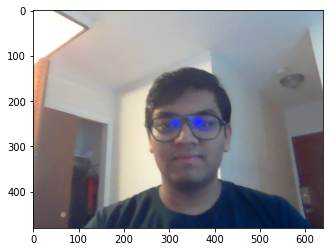

In [7]:
plt.imshow(face_img)

In [8]:
face_img.shape

(480, 640, 3)

In [9]:
dim1 = []
dim2 = []
for image_filename in os.listdir(TrainingImagePath+'\\face1'):
    
    img = imread(TrainingImagePath+'\\face1'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [10]:
classes = sum(os.path.isdir(os.path.join(TrainingImagePath,i)) for i in os.listdir(TrainingImagePath))



In [11]:
classes

18

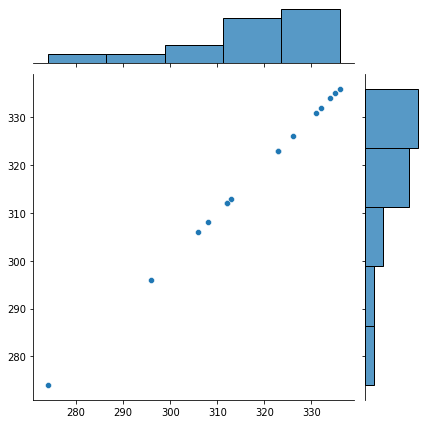

In [12]:
sns.jointplot(dim1,dim2)

In [13]:
np.mean(dim2)

317.4

In [14]:
image_shape = (315,315,3)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [17]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [18]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
def Jose():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())


    model.add(Dense(128))
    model.add(Activation('relu'))

    # Dropouts help reduce overfitting by randomly turning neurons off during training.
    # Here we say randomly turn off 50% of neurons.
    model.add(Dropout(0.1))

    # Last layer, remember its binary so we use sigmoid
    model.add(Dense(classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
   
    return model

In [19]:
model = Jose()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 313, 313, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 156, 156, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 154, 154, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 77, 77, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 128)      0

In [21]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

# Defining pre-processing transformations on raw images of testing data
# No transformations are done on the testing images
test_datagen = ImageDataGenerator()

# Generating the Training Data
training_set = image_gen.flow_from_directory(
        TrainingImagePath,
        target_size=(315, 315),
        batch_size=32,
        class_mode='categorical',shuffle=True)


# Generating the Testing Data
test_set = image_gen.flow_from_directory(
        TestingImagePath,
        target_size=(315, 315),
        batch_size=32,
        class_mode='categorical')

Found 278 images belonging to 18 classes.
Found 73 images belonging to 18 classes.


In [22]:
results = model.fit_generator(training_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])

Epoch 1/20
9/9 [==============================] - 22s 2s/step - loss: 5.1702 - accuracy: 0.0612 - val_loss: 2.8898 - val_accuracy: 0.0548
Epoch 2/20
9/9 [==============================] - 20s 2s/step - loss: 2.8845 - accuracy: 0.0647 - val_loss: 2.8823 - val_accuracy: 0.0548
Epoch 3/20
9/9 [==============================] - 19s 2s/step - loss: 2.8658 - accuracy: 0.1115 - val_loss: 2.8589 - val_accuracy: 0.1507
Epoch 4/20
9/9 [==============================] - 20s 2s/step - loss: 2.7976 - accuracy: 0.1619 - val_loss: 2.7489 - val_accuracy: 0.1507
Epoch 5/20
9/9 [==============================] - 19s 2s/step - loss: 2.6345 - accuracy: 0.1871 - val_loss: 2.5128 - val_accuracy: 0.1781
Epoch 6/20
9/9 [==============================] - 20s 2s/step - loss: 2.4232 - accuracy: 0.2302 - val_loss: 2.5020 - val_accuracy: 0.2740
Epoch 7/20
9/9 [==============================] - 21s 2s/step - loss: 2.3914 - accuracy: 0.2338 - val_loss: 2.2976 - val_accuracy: 0.2740
Epoch 8/20
9/9 [==================

In [30]:
import keras.utils as image

In [31]:
def pred(para_path):
    para_img = image.load_img(para_path,target_size=image_shape)
    plt.imshow(para_img)
    para_img=  image.img_to_array(para_img)
    para_img = para_img/255
    para_img = np.expand_dims(para_img,axis=0)
    result = model.predict(para_img).argmax()

    for a,b in training_set.class_indices.items():
        if b == result:
            print("The person is", a)
    return result
    

In [32]:
model.save('face_cnn.h5')

In [33]:
folders = []
for i in os.listdir(TestingImagePath):
    if os.path.isdir(os.path.join(TestingImagePath,i)):
        folders.append(i)

1face1.jpg
1/1 [==============================] - 0s 69ms/step
The person is face1
2face1.jpg
1/1 [==============================] - 0s 70ms/step
The person is face1
3face1.jpg
1/1 [==============================] - 0s 75ms/step
The person is face1
4face1.jpg
1/1 [==============================] - 0s 76ms/step
The person is face14
1face10.jpg
1/1 [==============================] - 0s 77ms/step
The person is face10
2face10.jpg
1/1 [==============================] - 0s 79ms/step
The person is face10
3face10.jpg
1/1 [==============================] - 0s 89ms/step
The person is face10
4face10.jpg
1/1 [==============================] - 0s 74ms/step
The person is face10
1face11.jpg
1/1 [==============================] - 0s 83ms/step
The person is face11
2face11.jpg
1/1 [==============================] - 0s 80ms/step
The person is face11
3face11.jpg
1/1 [==============================] - 0s 70ms/step
The person is face11
4face11.jpg
1/1 [==============================] - 0s 72ms/step
The pers

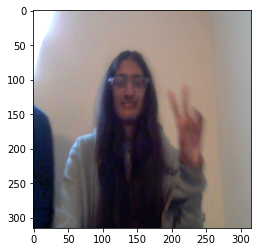

In [34]:
pre = []
for i in folders:

    for j in os.listdir(TestingImagePath + "\\" + i + "\\"):
        print(j)
        p = (TestingImagePath +'\\' + i +'\\'+j)
        pre.append(pred(p))
            
    

In [51]:
path = r'C:\Users\lasya\OneDrive\Desktop\Masters\Deep learning\project\Deep-Learning-Project\Face-Images\Face Images\Final Testing Images\face13\4face13.jpg'

1/1 [==============================] - 0s 64ms/step
The person is face13


4

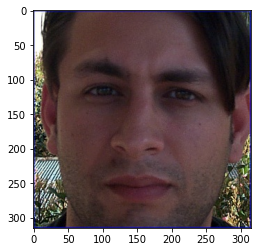

In [52]:
pred(path)

In [ ]:
print(classification_report(test_set.classes,pre))

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
def pre_trained():
    model = Sequential()

    model.add(ResNet50(include_top=False,pooling ='avg',weights='imagenet'))
    model.add(Dense(512,activation='relu'))
    model.add(Dense(16,activation='softmax'))
    model.layers[0].trainable = True
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model
    

In [ ]:
moodel = pre_trained()

In [ ]:
results = model.fit_generator(training_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])

In [ ]:
folders = []
for i in os.listdir(TestingImagePath):
    if 'face' in i:
        folders.append(i)

In [ ]:
pre = []
for i in folders:

    for j in os.listdir(TestingImagePath + "\\" + i + "\\"):
        print(j)
        p = (TestingImagePath +'\\' + i +'\\'+j)
        pre.append(pred(p))
            

In [ ]:
print(classification_report(test_set.classes,pre))

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
def pre_trained_VGG():
    model = Sequential()

    model.add(VGG16(include_top=False,pooling ='avg',weights='imagenet'))
    model.add(Dense(512,activation='relu'))
    model.add(Dense(16,activation='softmax'))
    model.layers[0].trainable = True
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [ ]:
model = pre_trained_VGG()

In [ ]:
results = model.fit_generator(training_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])

In [ ]:
folders = []
for i in os.listdir(TestingImagePath):
    if 'face' in i:
        folders.append(i)

In [ ]:
pre = []
for i in folders:

    for j in os.listdir(TestingImagePath + "\\" + i + "\\"):
        print(j)
        p = (TestingImagePath +'\\' + i +'\\'+j)
        pre.append(pred(p))

In [ ]:
print(classification_report(test_set.classes,pre))

In [ ]:
def AutoEncoder():
    encoder = Sequential()

    
    #encoder.add(Dense(315*315*3,input_shape = (315,315,3) ,activation='relu'))
    #encoder.add(Reshape([315,315,3]))
    #encoder.add(BatchNormalization())
    encoder.add(Flatten(input_shape = (315,315,3)))
    encoder.add(Dense(105,activation='relu'))
    encoder.add(Dense(35,activation='relu'))
    
   
   
    
    decoder = Sequential()

    decoder.add(Dense(105,activation='relu',input_shape = [35]))
    decoder.add(Dense(315*315*3,activation='relu'))
    decoder.add(Dense(16,activation='softmax'))
    
    
    model = Sequential([encoder,decoder])
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    
    
    
    
    return model, encoder, decoder

In [ ]:
a,b,c = AutoEncoder()

In [ ]:
b.summay()

In [ ]:
a.summary()

In [ ]:
c.summary()

In [ ]:
results = a.fit_generator(training_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
def face_rec():
    model = Sequential()

    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(315, 315, 3)))
    model.add(BatchNormalization()) #----------------
    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization()) #----------------
    model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
    model.add(BatchNormalization()) #----------------
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2)) #----------------

    model.add(Conv2D(128, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=5, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Dense(16, activation='softmax'))
    
    optimizer = RMSprop(lr=0.001)

    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    
    return model

In [ ]:
model = face_rec()

In [ ]:
results = model.fit_generator(training_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])

In [ ]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
def Basic():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())


    model.add(Dense(128))
    model.add(Activation('relu'))

    # Dropouts help reduce overfitting by randomly turning neurons off during training.
    # Here we say randomly turn off 50% of neurons.
    model.add(Dropout(0.1))

    # Last layer, remember its binary so we use sigmoid
    model.add(Dense(16))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
   
    return model

In [ ]:
model = Basic()

In [ ]:
model.summary()

In [ ]:
results = model.fit_generator(training_set,epochs=40,
                              validation_data=test_set,
                             callbacks=[early_stop])

In [ ]:
df = pd.DataFrame(results.history)

In [ ]:
df[['loss','val_loss']].plot()

In [ ]:
df[['accuracy','val_accuracy']].plot()